In [73]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import datetime
import gc
from tqdm import tqdm
import plotly.express as px

import pandas as pd
import numpy as np
from numpy import median

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.manifold import TSNE
from sklearn import preprocessing

from collections import Counter

import string
import re
from nltk.corpus import stopwords

import scipy
from scipy import hstack


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


In [74]:
from google.colab import files
uploaded = files.upload()

Saving 26_trading-statistics-may-2017.xlsx to 26_trading-statistics-may-2017 (1).xlsx
Saving 25_trading-statistics-apr-2017.xlsx to 25_trading-statistics-apr-2017 (1).xlsx
Saving 24_trading-statistics-mar-2017.xlsx to 24_trading-statistics-mar-2017 (1).xlsx
Saving 23_trading-statistics-feb-2017.xlsx to 23_trading-statistics-feb-2017 (1).xlsx
Saving 22_trading-statistics-jan-2017.xlsx to 22_trading-statistics-jan-2017 (1).xlsx
Saving 21_trading-statistics-dec-2016.xlsx to 21_trading-statistics-dec-2016 (1).xlsx
Saving 20_trading-statistics-nov-2016.xlsx to 20_trading-statistics-nov-2016 (1).xlsx
Saving 19_trading-statistics-oct-2016.xlsx to 19_trading-statistics-oct-2016 (1).xlsx
Saving 18_trading-statistics-sep-2016.xlsx to 18_trading-statistics-sep-2016 (1).xlsx
Saving 17_trading-statistics-aug-2016.xlsx to 17_trading-statistics-aug-2016 (1).xlsx
Saving 16_trading-statistics-jul-2016.xlsx to 16_trading-statistics-jul-2016 (1).xlsx
Saving 15_trading-statistics-jun-2016.xlsx to 15_tradi

In [76]:
path = os.getcwd()
files = os.listdir(path)
files

['.config',
 '10_trading-statistics-jan-2016 (1).xlsx',
 '2_trading-statistics-may-2015.xlsx',
 '9_trading-statistics-dec-2015 (1).xlsx',
 '2_trading-statistics-may-2015 (1).xlsx',
 '6_trading-statistics-sep-2015 (1).xlsx',
 '5_trading-statistics-aug-2015 (1).xlsx',
 '16_trading-statistics-jul-2016 (1).xlsx',
 '11_trading-statistics-feb-2016 (1).xlsx',
 '11_trading-statistics-feb-2016.xlsx',
 '15_trading-statistics-jun-2016 (1).xlsx',
 '8_trading-statistics-nov-2015 (1).xlsx',
 '14_trading-statistics-may-2016.xlsx',
 '12_trading-statistics-mar-2016.xlsx',
 '20_trading-statistics-nov-2016 (1).xlsx',
 '23_trading-statistics-feb-2017.xlsx',
 '18_trading-statistics-sep-2016 (1).xlsx',
 '13_trading-statistics-apr-2016 (1).xlsx',
 '6_trading-statistics-sep-2015.xlsx',
 '26_trading-statistics-may-2017.xlsx',
 '26_trading-statistics-may-2017 (1).xlsx',
 '12_trading-statistics-mar-2016 (1).xlsx',
 '4_trading-statistics-jul-2015 (1).xlsx',
 '24_trading-statistics-mar-2017 (1).xlsx',
 '7_trading-

In [77]:
files_xlsx = [f for f in files if f[-4:] == "xlsx"]
files_xlsx

['10_trading-statistics-jan-2016 (1).xlsx',
 '2_trading-statistics-may-2015.xlsx',
 '9_trading-statistics-dec-2015 (1).xlsx',
 '2_trading-statistics-may-2015 (1).xlsx',
 '6_trading-statistics-sep-2015 (1).xlsx',
 '5_trading-statistics-aug-2015 (1).xlsx',
 '16_trading-statistics-jul-2016 (1).xlsx',
 '11_trading-statistics-feb-2016 (1).xlsx',
 '11_trading-statistics-feb-2016.xlsx',
 '15_trading-statistics-jun-2016 (1).xlsx',
 '8_trading-statistics-nov-2015 (1).xlsx',
 '14_trading-statistics-may-2016.xlsx',
 '12_trading-statistics-mar-2016.xlsx',
 '20_trading-statistics-nov-2016 (1).xlsx',
 '23_trading-statistics-feb-2017.xlsx',
 '18_trading-statistics-sep-2016 (1).xlsx',
 '13_trading-statistics-apr-2016 (1).xlsx',
 '6_trading-statistics-sep-2015.xlsx',
 '26_trading-statistics-may-2017.xlsx',
 '26_trading-statistics-may-2017 (1).xlsx',
 '12_trading-statistics-mar-2016 (1).xlsx',
 '4_trading-statistics-jul-2015 (1).xlsx',
 '24_trading-statistics-mar-2017 (1).xlsx',
 '7_trading-statistics-o

In [78]:
df = pd.DataFrame()
for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

In [79]:
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,NaN,NaN,NaT,NaN,Call Option/ Put Option,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALGO,Non-ALGO
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,January,2016-01-01,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29,1 KGS,N.A.,...,-,-,311060250,3095,5761,1 MT,578116350,2614,1.308075,98.691925
4,2016,January,2016-01-01,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29,1 KGS,N.A.,...,-,-,11687600,115,215,1 MT,21822500,101,36.099156,63.900844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2172,Note:,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2173,Contracts with no volume and no Open Interest ...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2174,Spot price is not provided in case of Option C...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#df = df.drop([0,1,2], axis = 0)

In [81]:

df.Symbol.describe()

count       116914
unique          31
top       CRUDEOIL
freq          6688
Name: Symbol, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117330 entries, 0 to 2175
Data columns (total 26 columns):
 #   Column                                                                    Non-Null Count   Dtype         
---  ------                                                                    --------------   -----         
 0   Year                                                                      117122 non-null  object        
 1   Month                                                                     116914 non-null  object        
 2   Date                                                                      116914 non-null  datetime64[ns]
 3   Derivative segment                                                        116966 non-null  object        
 4   Instrument Type                                                           116966 non-null  object        
 5   Name of the commodity                                                     116914 non-null  object        
 6 

In [83]:
df.describe().T.style.set_properties(**{"background-color": "#AB8111", "font-size" : "17px",
                                        "color": "#ffffff", "border-radius" : "1px", "border": "1.5px solid black"})

,count,mean,std,min,25%,50%,75%,max
Close Price (In Rs),116914.000000,9644.789337,14466.624392,93.850000,199.200000,906.300000,20110.000000,52403.000000
Clearing/Daily Settlement price,116914.000000,9644.426153,14465.601784,93.850000,199.150000,906.900000,20110.000000,52403.000000


In [84]:
df.fillna(value = 0,inplace = True)
print(df)

                                                   Year    Month  \
0                                                     0        0   
1                                                     0        0   
2                                                     0        0   
3                                                  2016  January   
4                                                  2016  January   
...                                                 ...      ...   
2171                                                  0        0   
2172                                              Note:        0   
2173  Contracts with no volume and no Open Interest ...        0   
2174  Spot price is not provided in case of Option C...        0   
2175  In case of international referenceable commodi...        0   

                     Date                                 Derivative segment  \
0                       0                                                  0   
1                      

In [85]:
df

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0,0,0,0,0,0,0,0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29 00:00:00,1 KGS,N.A.,...,-,-,311060250,3095,5761,1 MT,578116350,2614,1.308075,98.691925
4,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29 00:00:00,1 KGS,N.A.,...,-,-,11687600,115,215,1 MT,21822500,101,36.099156,63.900844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2172,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2173,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2174,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
print('Shape of data: ', df.shape)

Shape of data:  (117330, 26)


In [87]:
df['Option Type']=df['Option Type'].replace('N.A.',0)
df.head(5)

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0,0,0,0,0,0,0,0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29 00:00:00,1 KGS,0,...,-,-,311060250,3095,5761,1 MT,578116350,2614,1.308075,98.691925
4,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29 00:00:00,1 KGS,0,...,-,-,11687600,115,215,1 MT,21822500,101,36.099156,63.900844


In [88]:
df[df.duplicated()]

,Year,Month,Date,Derivative segment,Instrument Type,Name of the commodity,Symbol,Expiry Date,Price unit,Option Type,...,Spot Price for basis variety (in Rs)*,Premium Turnover (in Rs),Notional Turnover (Options)/ Turnover (Futures) (in Rs),Trading Volume (In Lots),Open Interest \n(In Lots),Lot size and unit,Open Interest (Options Notional Basis) / Open Interest (Futures) (in Rs),No.of trades,Mode of Trading (% of Turnover),Unnamed: 25
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0,0,0,0,0,0,0,0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2172,Note:,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2173,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2174,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.replace('[#,@,&,(,),-]', '')
df = df.replace('-',np.nan)
df = df.replace('',np.nan)
df.head(10)

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,0.0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,0.0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.000000e+00,0.0,0,0
3,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29 00:00:00,1 KGS,0,...,NaN,NaN,311060250.0,3095.0,5761.0,1 MT,5.781164e+08,2614.0,1.308075,98.691925
4,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29 00:00:00,1 KGS,0,...,NaN,NaN,11687600.0,115.0,215.0,1 MT,2.182250e+07,101.0,36.099156,63.900844
5,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-03-31 00:00:00,1 KGS,0,...,NaN,NaN,NaN,NaN,8.0,1 MT,8.180000e+05,NaN,NaN,NaN
6,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-04-29 00:00:00,1 KGS,0,...,NaN,NaN,NaN,NaN,15.0,1 MT,1.550250e+06,NaN,NaN,NaN
7,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2016-01-29 00:00:00,1 KGS,0,...,NaN,NaN,840830250.0,1673.0,4898.0,5 MT,2.457572e+09,1366.0,6.882855,93.117145
8,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2016-02-29 00:00:00,1 KGS,0,...,NaN,NaN,13721750.0,27.0,55.0,5 MT,2.795375e+07,21.0,31.4692,68.5308
9,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM,ALUMINIUM,2016-03-31 00:00:00,1 KGS,0,...,NaN,NaN,NaN,NaN,2.0,5 MT,1.026500e+06,NaN,NaN,NaN


In [90]:
corr = df.corr()
corr.style.background_gradient(cmap = "copper")

,Open_Price_In_Rs,High_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs,Clearing/Daily_Settlement_price,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_ In_Lots,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades
Open_Price_In_Rs,1.000000,0.999961,0.999960,0.999939,0.999939,0.999482,nan,0.075171,-0.040254,0.105068,0.236224,-0.017219
High_Price_In_Rs,0.999961,1.000000,0.999939,0.999968,0.999967,0.999500,nan,0.075943,-0.039475,0.105907,0.236596,-0.016235
Low_Price_In_Rs,0.999960,0.999939,1.000000,0.999971,0.999971,0.999453,nan,0.074558,-0.040994,0.104007,0.235897,-0.018137
Close_Price_In_Rs,0.999939,0.999968,0.999971,1.000000,0.999989,0.999397,nan,0.075273,-0.040229,0.084468,0.205878,-0.017179
Clearing/Daily_Settlement_price,0.999939,0.999967,0.999971,0.999989,1.000000,0.999398,nan,0.075277,-0.040228,0.084486,0.205901,-0.017177
Spot_Price_for_basis_variety_in_Rs*,0.999482,0.999500,0.999453,0.999397,0.999398,1.000000,nan,0.077634,-0.038464,0.088547,0.215151,-0.015545
Premium_Turnover_in_Rs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Notional_Turnover___Options/_Turnover_Futures_in_Rs,0.075171,0.075943,0.074558,0.075273,0.075277,0.077634,nan,1.000000,0.579968,0.376515,0.694361,0.598403
Trading_Volume_In_Lots,-0.040254,-0.039475,-0.040994,-0.040229,-0.040228,-0.038464,nan,0.579968,1.000000,0.692198,0.202940,0.979996
Open_Interest_ In_Lots,0.105068,0.105907,0.104007,0.084468,0.084486,0.088547,nan,0.376515,0.692198,1.000000,0.364688,0.742613


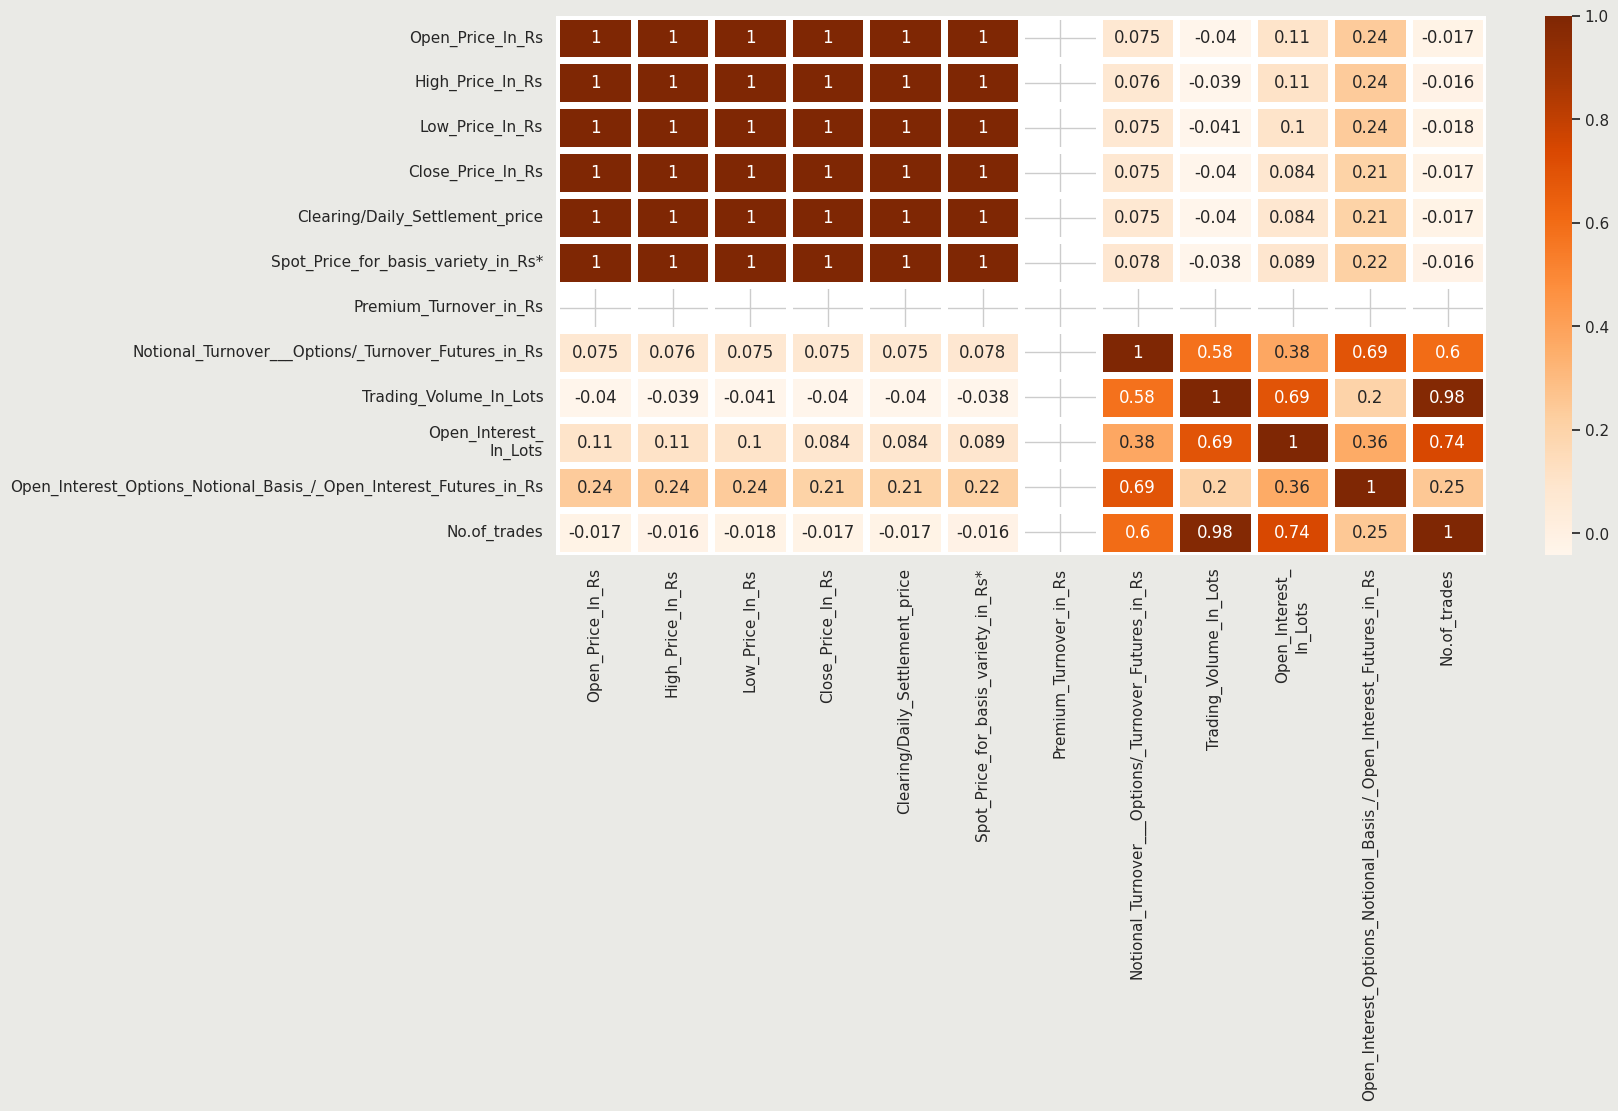

In [91]:
 plt.figure(figsize = [15, 7], clear = True, facecolor = '#EAEAE6')
 sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
             linecolor = "white", cmap = "Oranges");

In [92]:
df['Trading_Volume_In_Lots'].isnull().sum()

17520

In [93]:
df.dropna(subset=['Trading_Volume_In_Lots','Open_Price_In_Rs'], inplace=True)
df

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29 00:00:00,1 KGS,0,...,NaN,NaN,311060250.0,3095.0,5761.0,1 MT,578116350.0,2614.0,1.308075,98.691925
4,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29 00:00:00,1 KGS,0,...,NaN,NaN,11687600.0,115.0,215.0,1 MT,21822500.0,101.0,36.099156,63.900844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2172,Note:,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2173,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2174,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [21]:
#df = df.drop(['Derivative_segment',
 ##'Instrument_Type','Symbol',
 #'Expiry_Date',
 #'Price_unit',
# 'Option_Type','Premium_Turnover_in_Rs','Mode_of_Trading_%_of_Turnover','Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs','Expiry_Date','Strike_Price_In_Rs','Clearing/Daily_Settlement_price',
 #'Spot_Price_for_basis_variety_in_Rs*','Unnamed:_25'], axis =1)

#df

,Year,Month,Date,Name_of_the_commodity,Open_Price_In_Rs,High_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,No.of_trades
3,2015,May,2015-05-01 00:00:00,ALUMINIUM MINI,122.20,122.65,121.15,121.70,6.900548e+08,5659.0,2302.0,1 MT,4380.0
4,2015,May,2015-05-01 00:00:00,ALUMINIUM MINI,123.10,123.50,122.00,122.65,3.818375e+07,311.0,284.0,1 MT,276.0
5,2015,May,2015-05-01 00:00:00,ALUMINIUM MINI,123.00,123.85,123.00,123.35,4.933000e+05,4.0,49.0,1 MT,4.0
7,2015,May,2015-05-01 00:00:00,ALUMINIUM,121.75,122.65,121.10,121.65,2.183502e+09,3582.0,3730.0,5 MT,2709.0
8,2015,May,2015-05-01 00:00:00,ALUMINIUM,123.10,123.45,122.10,122.60,1.241192e+08,202.0,721.0,5 MT,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0,0,0,0,0.00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0,0.0
2172,Note:,0,0,0,0.00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0,0.0
2173,Contracts with no volume and no Open Interest ...,0,0,0,0.00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0,0.0
2174,Spot price is not provided in case of Option C...,0,0,0,0.00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0,0.0


In [94]:
df.dropna(subset=['Trading_Volume_In_Lots','Open_Price_In_Rs'], inplace=True)
df

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
1,0,0,0,Equity Derivatives/ Currency Derivatives/ Inte...,Equity Index Future/ Stock Future/ Equity Inde...,0,0,0,0,Call Option/ Put Option,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ALGO,Non-ALGO
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-01-29 00:00:00,1 KGS,0,...,NaN,NaN,311060250.0,3095.0,5761.0,1 MT,578116350.0,2614.0,1.308075,98.691925
4,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,ALUMINIUM MINI,ALUMINI,2016-02-29 00:00:00,1 KGS,0,...,NaN,NaN,11687600.0,115.0,215.0,1 MT,21822500.0,101.0,36.099156,63.900844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2172,Note:,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2173,Contracts with no volume and no Open Interest ...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0
2174,Spot price is not provided in case of Option C...,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [95]:
list(df.columns)

['Year',
 'Month',
 'Date',
 'Derivative_segment',
 'Instrument_Type',
 'Name_of_the_commodity',
 'Symbol',
 'Expiry_Date',
 'Price_unit',
 'Option_Type',
 'Strike_Price_In_Rs',
 'Open_Price_In_Rs',
 'High_Price_In_Rs',
 'Low_Price_In_Rs',
 'Close_Price_In_Rs',
 'Clearing/Daily_Settlement_price',
 'Spot_Price_for_basis_variety_in_Rs*',
 'Premium_Turnover_in_Rs',
 'Notional_Turnover___Options/_Turnover_Futures_in_Rs',
 'Trading_Volume_In_Lots',
 'Open_Interest_\nIn_Lots',
 'Lot_size_and_unit',
 'Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs',
 'No.of_trades',
 'Mode_of_Trading_%_of_Turnover',
 'Unnamed:_25']

In [96]:
df1 = df[(df['Name_of_the_commodity'] == 'SILVER')]
df1

,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
85,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-03-04 00:00:00,1 KGS,0,...,33006.0,NaN,2.642117e+09,2641.0,17320.0,30 KGS,1.732087e+10,2016.0,6.663992,93.336008
86,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-05-05 00:00:00,1 KGS,0,...,33006.0,NaN,3.444591e+07,34.0,755.0,30 KGS,7.648226e+08,34.0,33.824858,66.175142
192,2016,January,2016-01-04 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-03-04 00:00:00,1 KGS,0,...,33314.0,NaN,3.477682e+10,34343.0,15293.0,30 KGS,1.538461e+10,24187.0,31.209561,68.790439
193,2016,January,2016-01-04 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-05-05 00:00:00,1 KGS,0,...,33314.0,NaN,3.507930e+08,342.0,786.0,30 KGS,8.005646e+08,320.0,43.9798,56.0202
194,2016,January,2016-01-04 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-07-05 00:00:00,1 KGS,0,...,33314.0,NaN,3.112500e+06,3.0,19.0,30 KGS,1.971231e+07,3.0,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,2016,April,2016-04-29 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-05-05 00:00:00,1 KGS,0,...,41476.0,NaN,3.141405e+10,25173.0,2155.0,30 KGS,2.687242e+09,19937.0,36.915545,63.084455
2148,2016,April,2016-04-29 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-07-05 00:00:00,1 KGS,0,...,41476.0,NaN,2.343013e+10,18431.0,11961.0,30 KGS,1.517779e+10,14739.0,53.86871,46.13129
2149,2016,April,2016-04-29 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-09-05 00:00:00,1 KGS,0,...,41476.0,NaN,2.406494e+08,187.0,70.0,30 KGS,8.991990e+07,172.0,59.334157,40.665843
2150,2016,April,2016-04-29 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-12-05 00:00:00,1 KGS,0,...,41476.0,NaN,1.179480e+07,9.0,21.0,30 KGS,2.752092e+07,9.0,61.105148,38.894852


In [97]:
df2 = df1.drop_duplicates(subset='Month')
df2


,Year,Month,Date,Derivative_segment,Instrument_Type,Name_of_the_commodity,Symbol,Expiry_Date,Price_unit,Option_Type,...,Spot_Price_for_basis_variety_in_Rs*,Premium_Turnover_in_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,Open_Interest_Options_Notional_Basis_/_Open_Interest_Futures_in_Rs,No.of_trades,Mode_of_Trading_%_of_Turnover,Unnamed:_25
85,2016,January,2016-01-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-03-04 00:00:00,1 KGS,0,...,33006.0,NaN,2.642117e+09,2641.0,17320.0,30 KGS,1.732087e+10,2016.0,6.663992,93.336008
77,2015,May,2015-05-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2015-05-05 00:00:00,1 KGS,0,...,NaN,NaN,2.281980e+09,2087.0,946.0,30 KGS,1.037005e+09,1572.0,25.283179,74.716821
87,2015,December,2015-12-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2015-12-04 00:00:00,1 KGS,0,...,33729.0,NaN,3.764342e+09,3742.0,2817.0,30 KGS,2.814098e+09,2803.0,27.844021,72.155979
84,2015,September,2015-09-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2015-09-04 00:00:00,1 KGS,0,...,34652.0,NaN,2.963265e+09,2855.0,2358.0,30 KGS,2.441308e+09,2140.0,40.626423,59.373577
82,2015,August,2015-08-03 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2015-09-04 00:00:00,1 KGS,0,...,33794.0,NaN,1.871444e+10,18472.0,17403.0,30 KGS,1.748949e+10,13511.0,29.260605,70.739395
76,2016,July,2016-07-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-07-05 00:00:00,1 KGS,0,...,44293.0,NaN,3.692483e+09,2733.0,3166.0,30 KGS,4.327194e+09,2278.0,31.900956,68.099044
84,2016,February,2016-02-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-03-04 00:00:00,1 KGS,0,...,34568.0,NaN,1.679881e+10,16077.0,10293.0,30 KGS,1.076751e+10,11739.0,34.480647,65.519353
77,2016,June,2016-06-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-07-05 00:00:00,1 KGS,0,...,38350.0,NaN,2.006320e+10,17348.0,10851.0,30 KGS,1.251988e+10,13668.0,31.10736,68.89264
86,2015,November,2015-11-02 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2015-12-04 00:00:00,1 KGS,0,...,36082.0,NaN,2.156903e+10,19840.0,12946.0,30 KGS,1.405586e+10,14418.0,29.59035,70.40965
80,2016,March,2016-03-01 00:00:00,Commodity Derivatives,FUTCOM,SILVER,SILVER,2016-03-04 00:00:00,1 KGS,0,...,36205.0,NaN,2.109705e+09,1946.0,3227.0,30 KGS,3.448469e+09,1486.0,21.859922,78.140078


<Axes: xlabel='Month'>

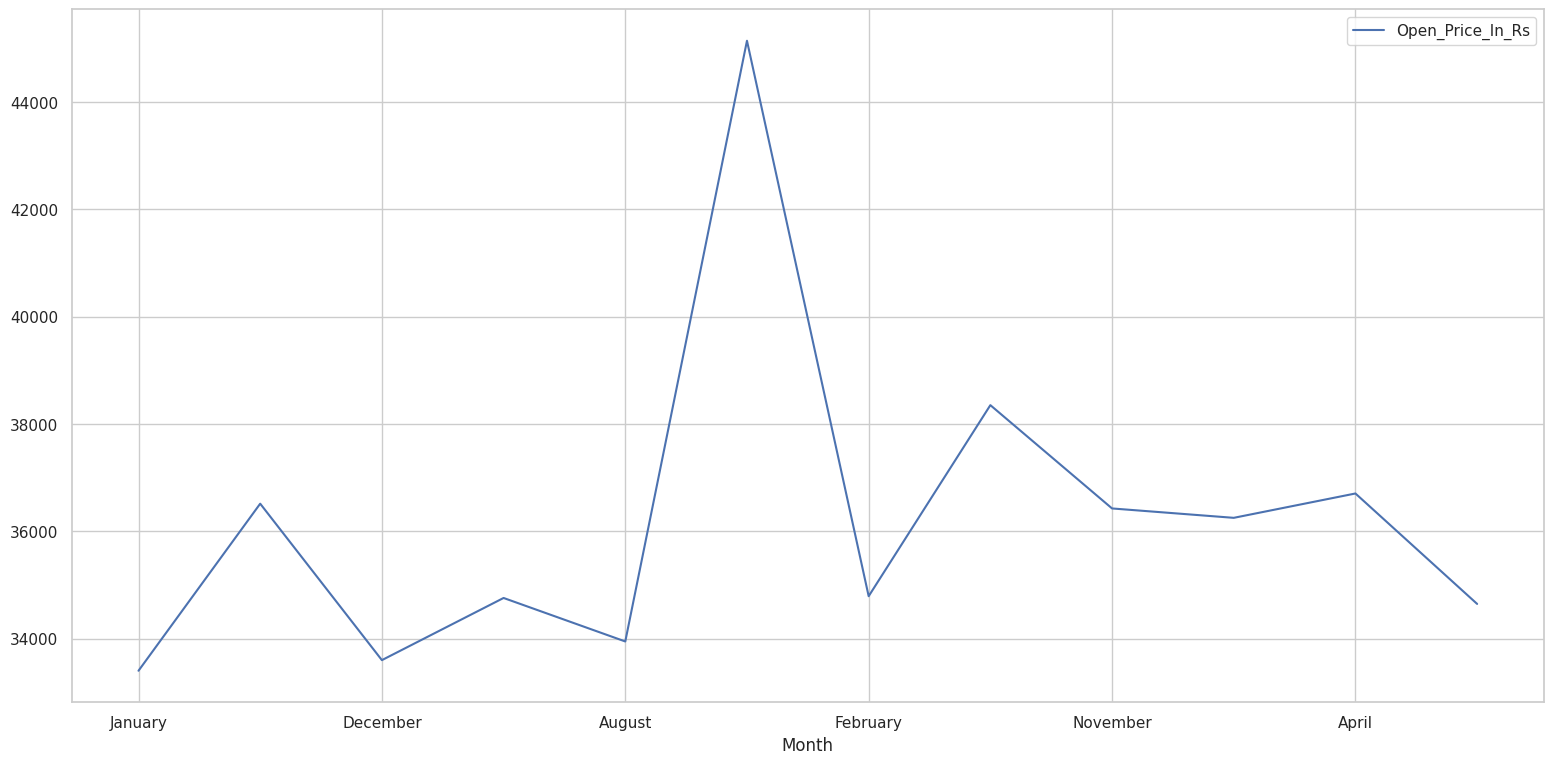

In [98]:


#df1.plot(x="Month", y=["Open_Price_In_Rs", "Close_Price_In_Rs"], kind="bar", figsize=(25, 10))
df2.plot(x="Month", y=["Open_Price_In_Rs"], kind="line", figsize=(19, 9))
# sns.lineplot(ax = axes[1], x = df["date"], y = df["high"]);
# sns.lineplot(ax = axes[2], x = df["date"], y = df["low"]);
#sns.lineplot(ax = axes[0], x = df["Date"], y = df["Close_Price_In_Rs"]);
# sns.lineplot(ax = axes[4], x = df["date"], y = df["volume"]);

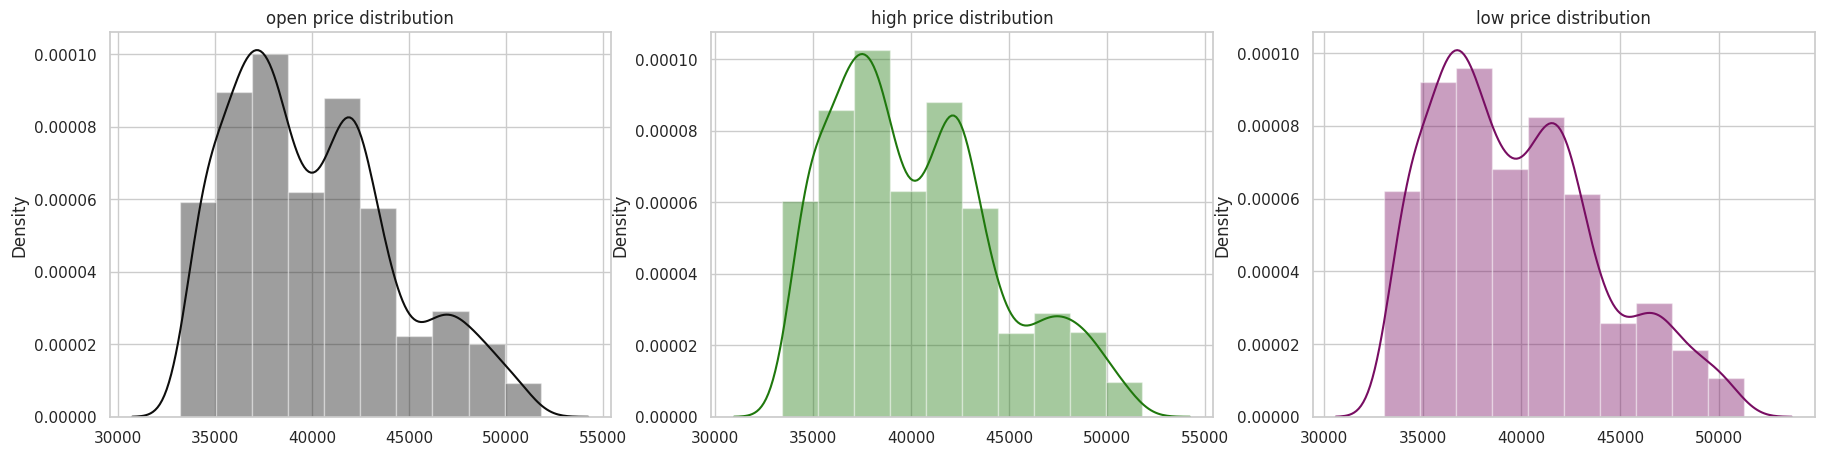

In [99]:
fig, axes = plt.subplots(1, 3, figsize = (22, 5))

sns.distplot(ax = axes[0], x = df1["Open_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0E0E0D").set(title = "open price distribution");

sns.distplot(ax = axes[1], x = df1["High_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#1F780D").set(title = "high price distribution");

sns.distplot(ax = axes[2], x = df1["Low_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#780D62").set(title = "low price distribution");

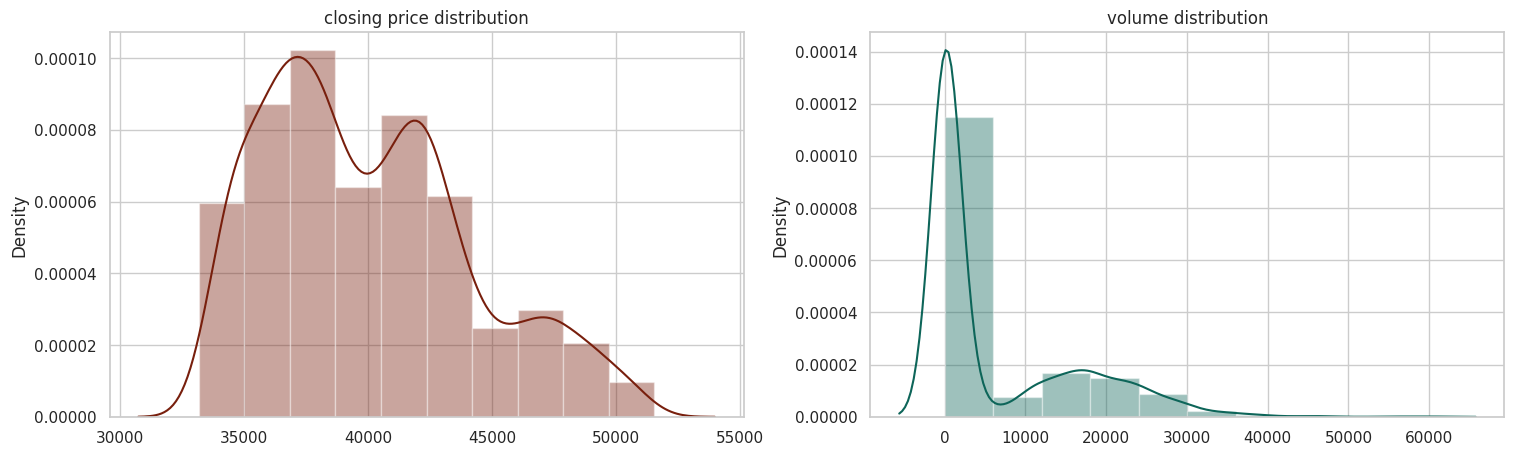

In [100]:
fig, axes = plt.subplots(1, 2, figsize = (18, 5))

sns.distplot(ax = axes[0], x = df1["Close_Price_In_Rs"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#781F0D").set(title = "closing price distribution");

sns.distplot(ax = axes[1], x = df1["Trading_Volume_In_Lots"], hist = True, bins = 10, kde = True,
             vertical = False, color = "#0D6559").set(title = "volume distribution");

In [ ]:
fig = px.histogram(df, x = "Close_Price_In_Rs", y = "Trading_Volume_In_Lots", marginal = "box", text_auto = True, template = "plotly_dark", hover_data  = df1.columns)
fig.show()

In [ ]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [54]:
X = df1[['High_Price_In_Rs','Low_Price_In_Rs','Close_Price_In_Rs']]
Y = df1['Open_Price_In_Rs']
print(X)
print(Y)

      High_Price_In_Rs  Low_Price_In_Rs  Close_Price_In_Rs
77             36658.0          36077.0            36540.0
78             37309.0          36710.0            37219.0
79             37789.0          37360.0            37721.0
80             38334.0          38334.0            38334.0
171            37742.0          36763.0            37130.0
...                ...              ...                ...
2147           41869.0          41250.0            41566.0
2148           42650.0          42000.0            42298.0
2149           43169.0          42625.0            42819.0
2150           43846.0          43523.0            43684.0
2151           44850.0          44600.0            44746.0

[1841 rows x 3 columns]
77      36514.0
78      37239.0
79      37778.0
80      38334.0
171     36901.0
         ...   
2147    41250.0
2148    42000.0
2149    42882.0
2150    43774.0
2151    44850.0
Name: Open_Price_In_Rs, Length: 1841, dtype: float64


In [55]:
df1

,Year,Month,Date,Name_of_the_commodity,Open_Price_In_Rs,High_Price_In_Rs,Low_Price_In_Rs,Close_Price_In_Rs,Notional_Turnover___Options/_Turnover_Futures_in_Rs,Trading_Volume_In_Lots,Open_Interest_\nIn_Lots,Lot_size_and_unit,No.of_trades
77,2015,May,2015-05-01 00:00:00,SILVER,36514.0,36658.0,36077.0,36540.0,2.281980e+09,2087.0,946.0,30 KGS,1572.0
78,2015,May,2015-05-01 00:00:00,SILVER,37239.0,37309.0,36710.0,37219.0,1.652450e+10,14864.0,9030.0,30 KGS,11060.0
79,2015,May,2015-05-01 00:00:00,SILVER,37778.0,37789.0,37360.0,37721.0,1.389112e+08,123.0,150.0,30 KGS,107.0
80,2015,May,2015-05-01 00:00:00,SILVER,38334.0,38334.0,38334.0,38334.0,1.150020e+06,1.0,8.0,30 KGS,1.0
171,2015,May,2015-05-04 00:00:00,SILVER,36901.0,37742.0,36763.0,37130.0,5.927618e+08,529.0,835.0,30 KGS,439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,2016,April,2016-04-29 00:00:00,SILVER,41250.0,41869.0,41250.0,41566.0,3.141405e+10,25173.0,2155.0,30 KGS,19937.0
2148,2016,April,2016-04-29 00:00:00,SILVER,42000.0,42650.0,42000.0,42298.0,2.343013e+10,18431.0,11961.0,30 KGS,14739.0
2149,2016,April,2016-04-29 00:00:00,SILVER,42882.0,43169.0,42625.0,42819.0,2.406494e+08,187.0,70.0,30 KGS,172.0
2150,2016,April,2016-04-29 00:00:00,SILVER,43774.0,43846.0,43523.0,43684.0,1.179480e+07,9.0,21.0,30 KGS,9.0


In [56]:
df1.shape

(1841, 13)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
X_train
Y_train


1545    41642.0
379     37000.0
1562    48653.0
1938    36141.0
2118    41050.0
         ...   
569     48048.0
1971    47128.0
85      34645.0
1160    38100.0
2041    42190.0
Name: Open_Price_In_Rs, Length: 1472, dtype: float64

In [58]:
X_test.shape

(369, 3)

In [59]:
model_trainer = RandomForestRegressor(n_estimators=150)
model_trainer.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=150)

In [60]:
test_data_prediction = model_trainer.predict(X_test)

In [67]:
Y_test = list(Y_test)


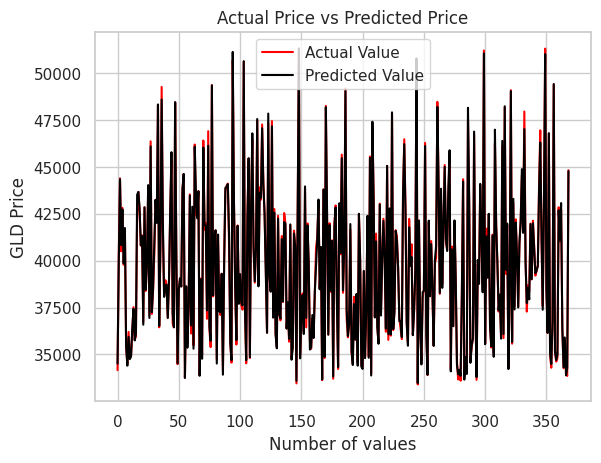

In [68]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [69]:
Y_test = np.array(Y_test)
test_data_prediction = np.array(test_data_prediction)

Y_test = np.reshape(Y_test, (-1, 1))
test_data_prediction = np.reshape(test_data_prediction, (-1, 1))
model_trainer.score(X_train, Y_train)

0.9995312443601189

In [75]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

rmse = np.sqrt(np.mean(((test_data_prediction - Y_test) ** 2)))
print("RMSE score of the model:", rmse)

AttributeError: ignored

In [41]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_train = scaler.fit_transform(X_train)


X_test = scaler.fit_transform(X_test)


Y_test = scaler.fit_transform(Y_test)


In [42]:
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))

Y_train = scaler.fit_transform(Y_train)
Y_train

array([[0.45439897],
       [0.20507036],
       [0.83097003],
       ...,
       [0.07857987],
       [0.26415297],
       [0.48383285]])

In [43]:
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1, 1))

Y_train = scaler.fit_transform(Y_train)
Y_train

array([[0.45439897],
       [0.20507036],
       [0.83097003],
       ...,
       [0.07857987],
       [0.26415297],
       [0.48383285]])

In [44]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
metrics=['accuracy']

model.compile(optimizer = "adam", loss = "mean_squared_error")

model.fit(X_train, Y_train, batch_size = 1, epochs = 25)

Epoch 1/25
1472/1472 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 2/25
1472/1472 [==============================] - 6s 4ms/step - loss: 6.2361e-04
Epoch 3/25
1472/1472 [==============================] - 5s 4ms/step - loss: 6.9575e-04
Epoch 4/25
1472/1472 [==============================] - 10s 7ms/step - loss: 5.9221e-04
Epoch 5/25
1472/1472 [==============================] - 9s 6ms/step - loss: 5.2368e-04
Epoch 6/25
1472/1472 [==============================] - 6s 4ms/step - loss: 4.5114e-04
Epoch 7/25
1472/1472 [==============================] - 6s 4ms/step - loss: 5.0263e-04
Epoch 8/25
1472/1472 [==============================] - 6s 4ms/step - loss: 4.8511e-04
Epoch 9/25
1472/1472 [==============================] - 6s 4ms/step - loss: 4.7151e-04
Epoch 10/25
1472/1472 [==============================] - 5s 4ms/step - loss: 4.8913e-04
Epoch 11/25
1472/1472 [==============================] - 6s 4ms/step - loss: 4.6261e-04
Epoch 12/25
1472/1472 [=====================

In [45]:
model.evaluate(X_test, Y_test)

12/12 [==============================] - 1s 3ms/step - loss: 4.2731e-04


0.00042731306166388094

In [46]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

12/12 [==============================] - 1s 3ms/step


array([[0.0802172 ],
       [0.39055264],
       [0.6162942 ],
       [0.4160685 ],
       [0.53249794],
       [0.37086818],
       [0.47314095],
       [0.13174061],
       [0.07570799],
       [0.15286916],
       [0.09567711],
       [0.10201765],
       [0.17860152],
       [0.23942815],
       [0.15297627],
       [0.17254287],
       [0.55266464],
       [0.57794106],
       [0.5337735 ],
       [0.41907296],
       [0.45818016],
       [0.1974628 ],
       [0.5332182 ],
       [0.2936214 ],
       [0.39735225],
       [0.60660326],
       [0.21077803],
       [0.705476  ],
       [0.22627299],
       [0.30098248],
       [0.4180385 ],
       [0.5622901 ],
       [0.49266014],
       [0.820778  ],
       [0.19106898],
       [0.4263528 ],
       [0.8451737 ],
       [0.49951783],
       [0.27811173],
       [0.31361175],
       [0.31084186],
       [0.2177929 ],
       [0.32436973],
       [0.527617  ],
       [0.6775289 ],
       [0.23067448],
       [0.19532752],
       [0.827

In [47]:
Y_test = scaler.inverse_transform(Y_test)
X_test = scaler.inverse_transform(X_test)
X_train = scaler.inverse_transform(X_train)
Y_train = scaler.inverse_transform(Y_train)

In [48]:
rmse = np.sqrt(np.mean(((predictions - Y_test) ** 2)))
print("RMSE score of the model:", rmse)

RMSE score of the model: 0.02067155022695409


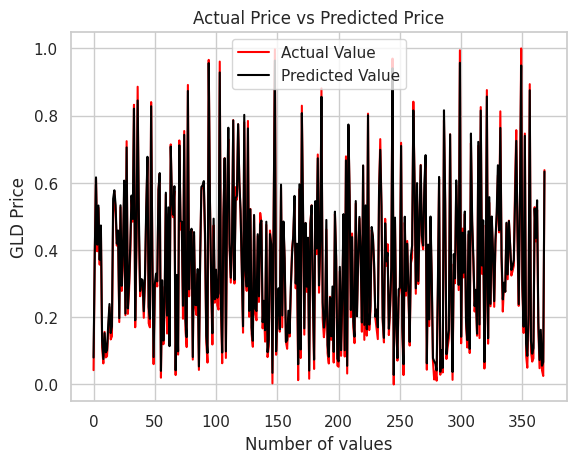

In [49]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(predictions, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [50]:
Y_test_df = pd.DataFrame(Y_test,columns = ['Actual'])
predictions_df = pd.DataFrame(predictions, columns = ['Predicted'])
Y_test_df

,Actual
0,0.042570
1,0.387933
2,0.613743
3,0.396369
4,0.525810
...,...
364,0.048324
365,0.134078
366,0.041955
367,0.025307


In [51]:
valid = pd.concat([Y_test_df, predictions_df], axis=1, join='inner')
valid

,Actual,Predicted
0,0.042570,0.080217
1,0.387933,0.390553
2,0.613743,0.616294
3,0.396369,0.416068
4,0.525810,0.532498
...,...,...
364,0.048324,0.072799
365,0.134078,0.162678
366,0.041955,0.055680
367,0.025307,0.066698


In [52]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
predicted

12/12 [==============================] - 0s 3ms/step


array([[0.0802172 ],
       [0.39055264],
       [0.6162942 ],
       [0.4160685 ],
       [0.53249794],
       [0.37086818],
       [0.47314095],
       [0.13174061],
       [0.07570799],
       [0.15286916],
       [0.09567711],
       [0.10201765],
       [0.17860152],
       [0.23942815],
       [0.15297627],
       [0.17254287],
       [0.55266464],
       [0.57794106],
       [0.5337735 ],
       [0.41907296],
       [0.45818016],
       [0.1974628 ],
       [0.5332182 ],
       [0.2936214 ],
       [0.39735225],
       [0.60660326],
       [0.21077803],
       [0.705476  ],
       [0.22627299],
       [0.30098248],
       [0.4180385 ],
       [0.5622901 ],
       [0.49266014],
       [0.820778  ],
       [0.19106898],
       [0.4263528 ],
       [0.8451737 ],
       [0.49951783],
       [0.27811173],
       [0.31361175],
       [0.31084186],
       [0.2177929 ],
       [0.32436973],
       [0.527617  ],
       [0.6775289 ],
       [0.23067448],
       [0.19532752],
       [0.827